# Final Project
L. Eikenberry "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work"

## Import Packages

In [536]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats 
import scipy.stats as stats
from scipy.stats import pearsonr

#clustering
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

## Import Data

In [537]:
df=pd.read_csv("data/moviedata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Business and Data Understanding
### Problem Statement
We want to determine which qualities of those contained in the IMDB score dataset are most influential in determining how high a movie scores. 
### Business Context
The determining of qualities that cause IMDB scores to go up would be very important to filmmakers and film production companies as they, of course, want to maximize profits. 
### Business Value of the Solution
This project would be very valuable to the aforementioned clients. IMDB scores are important to those in the film industry, and maximizing they scores is not only good for the profitability of the movie in it entirety, but is very influential on individuals that are involved in the movie's production. Actor and director individual popularity can increase from a good IMDB  movie score, and that would increase the value of that individuals' skill set. 

# Data Processing 
Here we will deal with issues in the data's clarity, integrity, and consistency.

### Identify Quality Issues

In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [539]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

There seems to be quite a bit of missing data. We will fix this in the below section.

## Data Cleaning 
### Renaming Columns 

In [540]:
df.columns = df.columns.str.replace('_','')
df.columns

Index(['color', 'directorname', 'numcriticforreviews', 'duration',
       'directorfacebooklikes', 'actor3facebooklikes', 'actor2name',
       'actor1facebooklikes', 'gross', 'genres', 'actor1name', 'movietitle',
       'numvotedusers', 'casttotalfacebooklikes', 'actor3name',
       'facenumberinposter', 'plotkeywords', 'movieimdblink',
       'numuserforreviews', 'language', 'country', 'contentrating', 'budget',
       'titleyear', 'actor2facebooklikes', 'imdbscore', 'aspectratio',
       'moviefacebooklikes'],
      dtype='object')

### Handling Missing Values
The following empty values will be replaced with a median, mean, or mode value in order to keep as many entries in the analysis as possible:
   * Aspect Ratio
   * Duration
   * Number of Critics for Reviews
   * Director Facebook Likes
   * Actor 3 Facebook Likes
   * Actor 1 Facenbook Likes
   * Face Number in Poster
   * Number of Users for Reviews
   * Actor 2 Facebook Likes

The following empty values will be replaced with the most frequently used string values:
   * Color
   * Language
   * Country 
   * Content Rating

The following empty values will be filled with 'No Data':
   * Director Name
   * Actor 2 Name
   * Actor 1 Name
   * Actor 3 Name
   * Plot Key Words

Rows with any data missing in the following columns will be dropped from the dataset*:
   * Gross
   * Budget
   * Title Year

*I am choosing to remove these values because I believe they will be heavily correlated to imdb_score, and replacing the empty values would supress any strong correlation we may find later. 

In [541]:
df = df.fillna({'aspectratio': (df['aspectratio'].median())})
df = df.fillna({'duration': (df['duration'].median())})
df = df.fillna({'numcriticforreviews': (df['numcriticforreviews'].mean())})
df = df.fillna({'directorfacebooklikes': (df['directorfacebooklikes'].mean())})
df = df.fillna({'actor3facebooklikes': (df['actor3facebooklikes'].median())})
df = df.fillna({'actor1facebooklikes': (df['actor1facebooklikes'].mean())})
df = df.fillna({'facenumberinposter': (df['facenumberinposter'].median())})
df = df.fillna({'numuserforreviews': (df['numuserforreviews'].median())})
df = df.fillna({'actor2facebooklikes': (df['actor2facebooklikes'].median())})
df["color"].fillna("Color", inplace = True) 
df["language"].fillna("English", inplace = True) 
df["country"].fillna("USA", inplace = True) 
df["contentrating"].fillna("R", inplace = True) 
df["directorname"].fillna("No Data", inplace = True) 
df["actor2name"].fillna("No Data", inplace = True) 
df["actor1name"].fillna("No Data", inplace = True) 
df["actor3name"].fillna("No Data", inplace = True) 
df["plotkeywords"].fillna("No Data", inplace = True) 
df=df.dropna()

In [542]:
df.isnull().sum()

color                     0
directorname              0
numcriticforreviews       0
duration                  0
directorfacebooklikes     0
actor3facebooklikes       0
actor2name                0
actor1facebooklikes       0
gross                     0
genres                    0
actor1name                0
movietitle                0
numvotedusers             0
casttotalfacebooklikes    0
actor3name                0
facenumberinposter        0
plotkeywords              0
movieimdblink             0
numuserforreviews         0
language                  0
country                   0
contentrating             0
budget                    0
titleyear                 0
actor2facebooklikes       0
imdbscore                 0
aspectratio               0
moviefacebooklikes        0
dtype: int64

### Data Transforming
All of the genres a movie is classified as in stacked in the same column and seperate with a "|". We will fix this problem below. 

In [543]:
g = df[['genres','imdbscore']]
g.head()

,genres,imdbscore
0,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Action|Adventure|Fantasy,7.1
2,Action|Adventure|Thriller,6.8
3,Action|Thriller,8.5
5,Action|Adventure|Sci-Fi,6.6


In [544]:
b = pd.DataFrame(g.genres.str.split('|').tolist(), index=g.imdbscore).stack()
b = b.reset_index()[[0, 'imdbscore']] 
b.head()

,0,imdbscore
0,Action,7.9
1,Adventure,7.9
2,Fantasy,7.9
3,Sci-Fi,7.9
4,Action,7.1


In [545]:
k = df[['plotkeywords','imdbscore']]
k.head()

,plotkeywords,imdbscore
0,avatar|future|marine|native|paraplegic,7.9
1,goddess|marriage ceremony|marriage proposal|pi...,7.1
2,bomb|espionage|sequel|spy|terrorist,6.8
3,deception|imprisonment|lawlessness|police offi...,8.5
5,alien|american civil war|male nipple|mars|prin...,6.6


In [546]:
p = pd.DataFrame(k.plotkeywords.str.split('|').tolist(), index=k.imdbscore).stack()
p = p.reset_index()[[0, 'imdbscore']] 
p.head()

,0,imdbscore
0,avatar,7.9
1,future,7.9
2,marine,7.9
3,native,7.9
4,paraplegic,7.9


Since each movie has an undetermined amount of genres and plot keywords, trying to join these datasets to the larger main df dataset will create problems with missing data and inconsistency. We will thus evaluate these smaller datasets individually. 

# Data Visualization and Business Intelligence
Now we will look at some data visualization tools to give us a better idea of the data we are working with.

## Numerical values
### Correlation
We will look at correlation first in order to determine which x values are most worth looking into. 

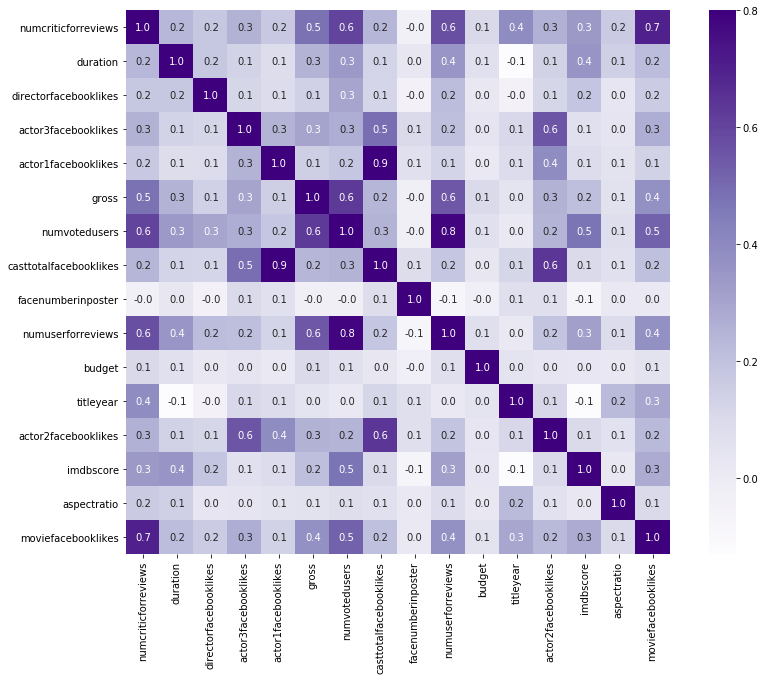

In [547]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f", cmap="Purples"); 

The following variables have correlation factors of equal to or greater than 0.3:
   * numvotedusers
   * duration
   * numcriticforreviews
   * numusersforreviews
   * movie facebook likes
   
We will look into these individual float values throughout the entirety of the project. There are no variables with negatively significant correlation factors. 

### Visualization
The two highest correlated x values are shown below. 

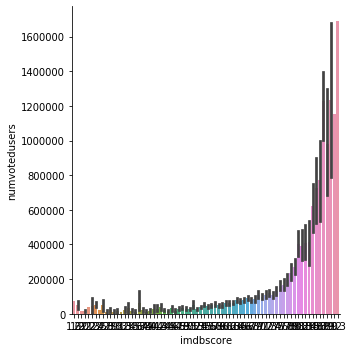

In [548]:
sns.catplot("imdbscore", "numvotedusers", data=df, kind='bar');

There seems to be a very clear positive correlation between num voted users and IMDB score. We will test the significance of this hypothesis in further sections. 

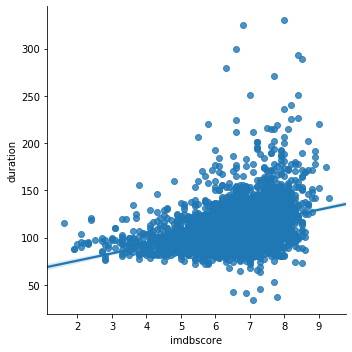

In [549]:
sns.lmplot("imdbscore", "duration", data=df, fit_reg=True);

There is a slight upward slope of this line, implying that there may be a significant positive correlation between duration and IMDB score. 

## Categorical Values
In this section we will explore the "color" data and "content rating" columns, as there are a finite limits of options to select form this list. Each category can be separated and compared individually. 
### Data Visualization


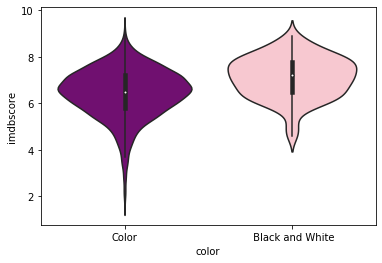

In [550]:
sns.violinplot("color", "imdbscore", data=df,
               palette=["purple", "pink"])

The only noticible difference between color and black and white movie is that color movies have a much wider range of previous IMDB scores. It is difficult to tell, though, if one is preferred to the other by the IMDB rating system. 

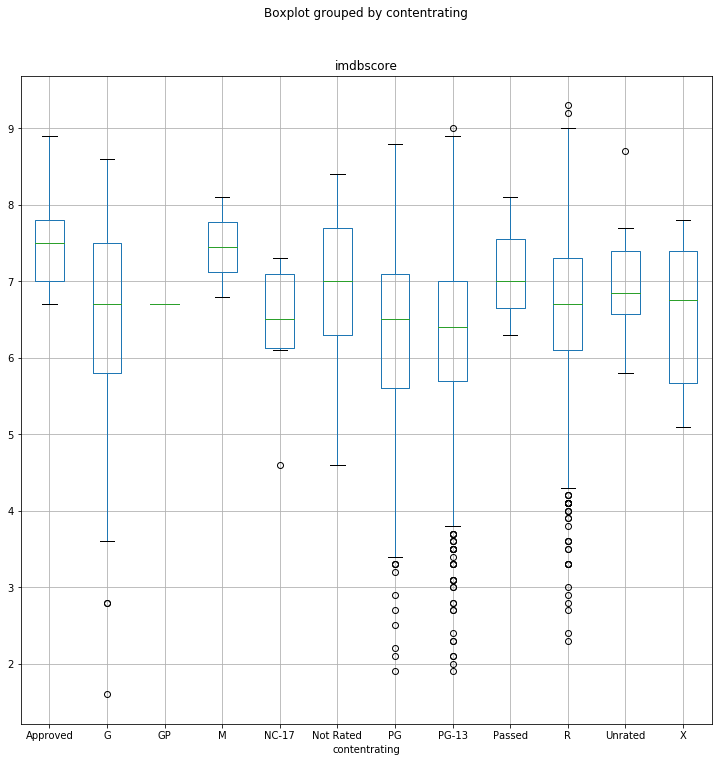

In [551]:
df.boxplot('imdbscore', by='contentrating', figsize=(12, 12))

The content rating categories with the highest score in this graph are "M" and "Approved." We cannot tell from this graph if the different scores produced by different content ratings are signifcant or not. 

# Float Values 
In this simple section we will explore who the most successful actors and directors are in terms of imdb scores.
   * language 
   * country
   * genres
   * directorname
   * actor names (1,2,3)
   * movietitle
   * plotkeywords
## Data Visualization

#### Language
The highest imdb scores were generated by the movies that did not have a language listed in the dataset. Excluding those movies, the best languages in terms of imdb scores are:
   1. Telugu
   2. Persian
   3. Danish
   4. Romanian
   5. Indonesian

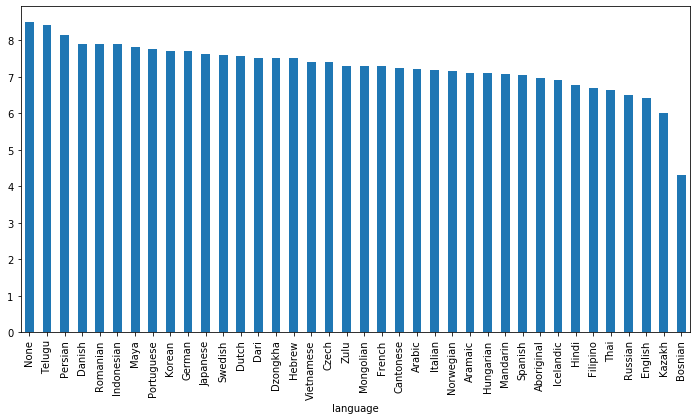

In [552]:
df.groupby('language')['imdbscore'].mean().sort_values(ascending=False).plot(kind=('bar'), figsize = (12,6))

#### Country
The top five countries in terms of imdb scores are:
   1. West Germany
   2. Brazil
   3. Iran
   4. Argentina
   5. Sweden

In [553]:
df.groupby('country')['imdbscore'].mean().sort_values(ascending=False).head(16)

country
West Germany    8.400000
Brazil          7.760000
Iran            7.725000
Argentina       7.600000
Sweden          7.600000
Indonesia       7.600000
Netherlands     7.566667
Colombia        7.500000
Israel          7.500000
New Zealand     7.481818
South Africa    7.433333
Afghanistan     7.400000
Italy           7.345455
Denmark         7.233333
Finland         7.200000
Norway          7.150000
Name: imdbscore, dtype: float64

#### Genres
The top 5 genres in terms of imdb scoers are 
   1. Film-Noir
   2. Biography
   3. History
   4. War
   5. Documentary

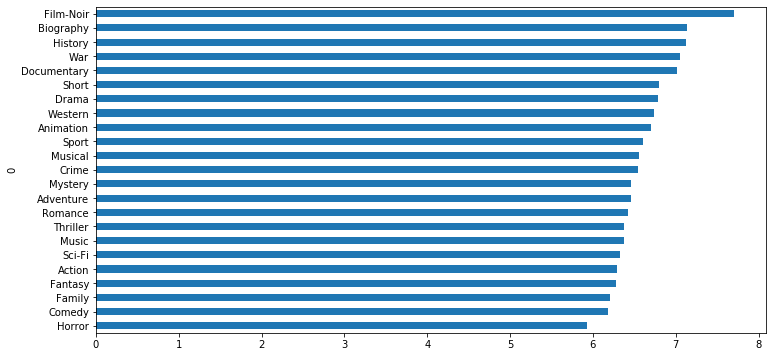

In [554]:
b.groupby(0)['imdbscore'].mean().sort_values(ascending=True).plot(kind=('barh'), figsize = (12,6))

#### Directorname
The top five directors in terms of imdb scores are:
   1. Aki Kaurismaki
   2. Adrienne Shelby
   3. Aaron Schneider
   4. Adam McKay
   5. Agnieszka Holland

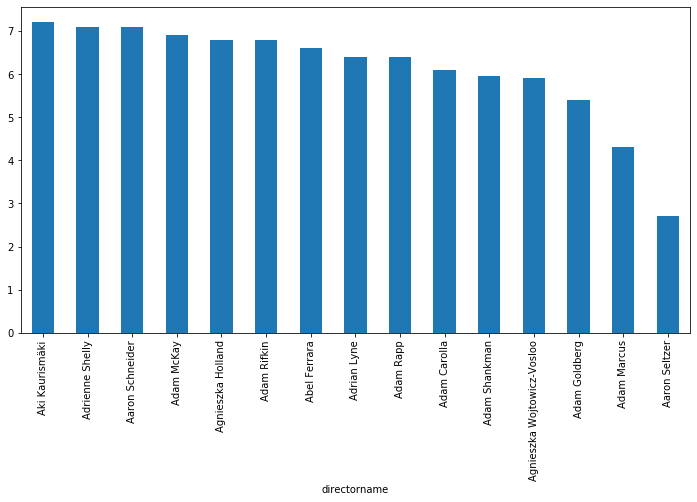

In [555]:
df.groupby('directorname')['imdbscore'].mean().head(15).sort_values(ascending=False).plot(kind=('bar'), figsize = (12,6))

#### Actornames
The following tables are the top five actors in the three categories:

*Actor1*

In [556]:
df.groupby('actor1name')['imdbscore'].mean().head(5).sort_values(ascending=False)

actor1name
Abbie Cornish        7.066667
Aasif Mandvi         6.700000
Aaliyah              5.200000
50 Cent              5.000000
Abhishek Bachchan    3.300000
Name: imdbscore, dtype: float64

*Actor2*

In [557]:
df.groupby('actor2name')['imdbscore'].mean().head(5).sort_values(ascending=False)

actor2name
50 Cent               7.100000
AJ Michalka           6.833333
Aaron Hughes          6.500000
A. Michael Baldwin    6.500000
Aaron Stanford        6.300000
Name: imdbscore, dtype: float64

*Actor3*

In [558]:
df.groupby('actor3name')['imdbscore'].mean().head(5).sort_values(ascending=False)

actor3name
Aaron Stanford    7.600000
Aaliyah           6.100000
50 Cent           6.000000
A.J. Buckley      5.733333
A.J. Langer       3.900000
Name: imdbscore, dtype: float64

#### Movietitle
The top 5 movies in terms of imbd scores are:
   1. 12 Years a Slave
   2. 127 Hours
   3. 10 Days in a Madhouse
   4. 13 Hours
   5. 10 Cloverfield Lane

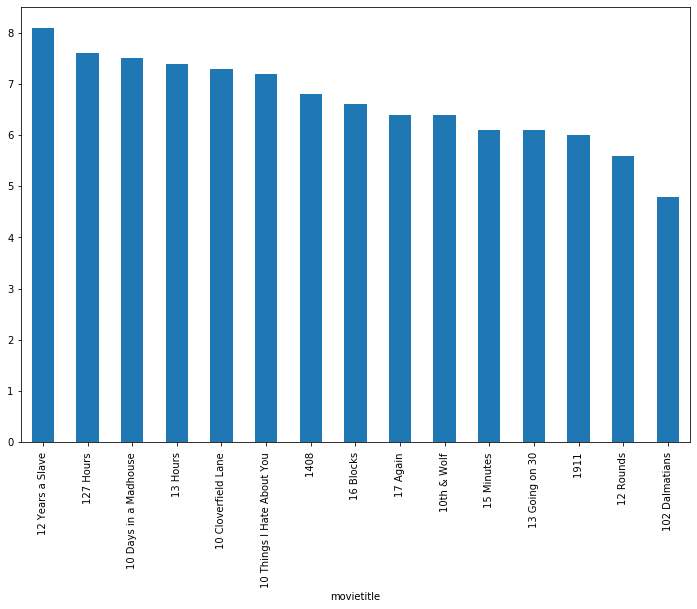

In [559]:
df.groupby('movietitle')['imdbscore'].max().head(15).sort_values(ascending=False).plot(kind= "bar", figsize= (12,8))

#### PlotKeyword
The most popular plotkeywords in terms of imbd scores are:
    1. 14th century
    2. 12 year time span
    3. 14 year old
    4. 12th century
    5. 15th birthday

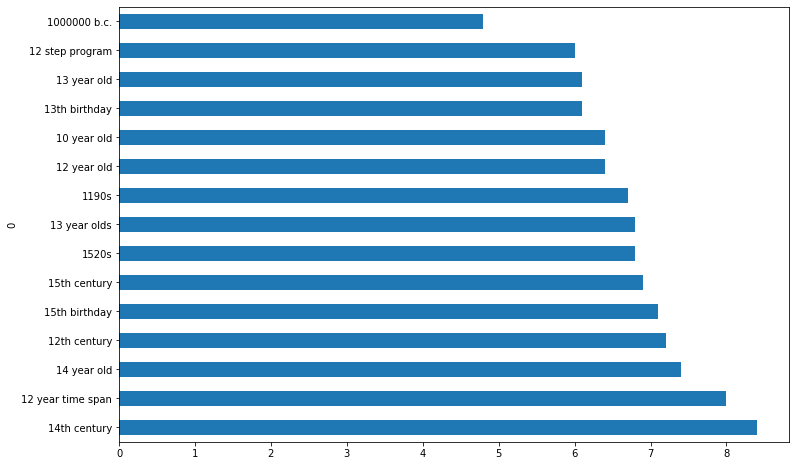

In [560]:
p.groupby(0)['imdbscore'].max().head(15).sort_values(ascending=False).plot(kind= "barh", figsize= (12,8))

# Exploratory Data Analysis
## Correlation Analysis
As already touched on above, the correlation analysis is important for determining which values we should look further into regarding thier effect on IMDB score.

In [561]:
df.corr()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
numcriticforreviews,1.000000,0.239339,0.179262,0.256930,0.172198,0.477022,0.600467,0.244007,-0.033993,0.573599,0.107675,0.392394,0.258964,0.340227,0.164919,0.703414
duration,0.239339,1.000000,0.180814,0.127904,0.087232,0.252818,0.344179,0.124516,0.032083,0.356247,0.069564,-0.128210,0.132067,0.358273,0.144818,0.221743
directorfacebooklikes,0.179262,0.180814,1.000000,0.119515,0.091600,0.142158,0.301847,0.121031,-0.047136,0.220459,0.019235,-0.045781,0.118443,0.189293,0.034724,0.162555
actor3facebooklikes,0.256930,0.127904,0.119515,1.000000,0.253965,0.303198,0.271351,0.490296,0.104594,0.209947,0.041278,0.111770,0.554644,0.064588,0.043633,0.272033
actor1facebooklikes,0.172198,0.087232,0.091600,0.253965,1.000000,0.148887,0.183601,0.945127,0.064688,0.127472,0.017554,0.091258,0.392102,0.091885,0.054683,0.131601
gross,0.477022,0.252818,0.142158,0.303198,0.148887,1.000000,0.631404,0.240982,-0.030783,0.552499,0.102179,0.046575,0.256761,0.211525,0.056805,0.375455
numvotedusers,0.600467,0.344179,0.301847,0.271351,0.183601,0.631404,1.000000,0.254050,-0.031955,0.782493,0.068834,0.016773,0.249130,0.473209,0.077138,0.522649
casttotalfacebooklikes,0.244007,0.124516,0.121031,0.490296,0.945127,0.240982,0.254050,1.000000,0.087023,0.185527,0.030189,0.120310,0.643007,0.104546,0.065698,0.206783
facenumberinposter,-0.033993,0.032083,-0.047136,0.104594,0.064688,-0.030783,-0.031955,0.087023,1.000000,-0.078637,-0.021984,0.069919,0.073309,-0.067870,0.017589,0.015260
numuserforreviews,0.573599,0.356247,0.220459,0.209947,0.127472,0.552499,0.782493,0.185527,-0.078637,1.000000,0.073352,0.011868,0.192924,0.320005,0.089032,0.376885


## Statistical hypothesis testing

We will test the following hypothesis:
    "If the movie is in color, then IMDB Score will be higher."

In [562]:
from scipy.stats import ttest_ind
ttest_ind(*df.groupby('color')['imdbscore'].apply(lambda x:list(x)))

Ttest_indResult(statistic=7.267202991732777, pvalue=4.4131506661029804e-13)

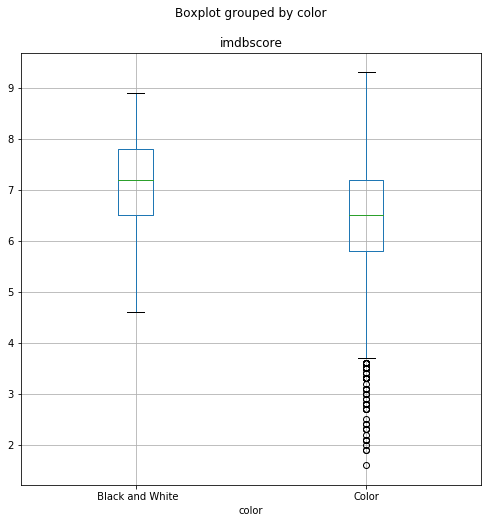

In [563]:
df.boxplot('imdbscore', by='color', figsize=(8, 8))

Statistical testing shows Black and White movies are statistically rated higher than color movies are on IMDB.

# Regression Analysis
## SK learn Model
### Building Model

In [564]:
X = df[['numcriticforreviews', 'duration', 'directorfacebooklikes', 'actor3facebooklikes', 'actor1facebooklikes', 'gross', 'numvotedusers', 'casttotalfacebooklikes', 'facenumberinposter', 'numuserforreviews', 'budget', 'titleyear', 'actor2facebooklikes', 'aspectratio', 'moviefacebooklikes']]
y = df['imdbscore'] 

In [565]:
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)
print('Coefficients: ', model1.coef_)
print("Y-Intercept: ", model1.intercept_)

Coefficients:  [ 2.37164912e-03  1.03167088e-02  3.39884859e-06  8.33877593e-05
  7.97054956e-05 -1.97000466e-09  3.76046997e-06 -7.87013040e-05
 -2.59702151e-02 -6.20459908e-04 -4.63066339e-11 -1.95743772e-02
  8.25301814e-05 -5.42144892e-02 -1.74716541e-06]
Y-Intercept:  44.29215369002356


In [566]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

,0,1
0,numcriticforreviews,2.371649e-03
1,duration,1.031671e-02
2,directorfacebooklikes,3.398849e-06
3,actor3facebooklikes,8.338776e-05
4,actor1facebooklikes,7.970550e-05
5,gross,-1.970005e-09
6,numvotedusers,3.760470e-06
7,casttotalfacebooklikes,-7.870130e-05
8,facenumberinposter,-2.597022e-02
9,numuserforreviews,-6.204599e-04


### Evaluating Model

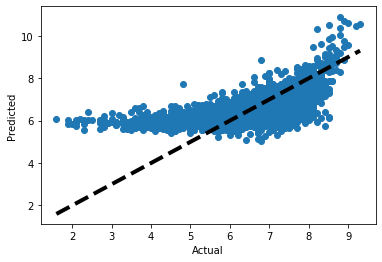

In [567]:
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [568]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7281246918052668
variance or r-squared:  0.346984325951854


This model has a very low R-Square value, and is a poor regression model for predicting IMDB score. 

## Statmodel
### Building Model

In [569]:
model3 = lm.LinearRegression()
model3.fit(X, y)   
model3_y = model2.predict(X)

In [570]:
model3 = lm.LinearRegression()
model3.fit(X, y)   
model3_y = model2.predict(X)
print('Coefficients: ', model3.coef_)
print("Y-Intercept: ", model3.intercept_)

Coefficients:  [ 2.37164912e-03  1.03167088e-02  3.39884859e-06  8.33877593e-05
  7.97054956e-05 -1.97000466e-09  3.76046997e-06 -7.87013040e-05
 -2.59702151e-02 -6.20459908e-04 -4.63066339e-11 -1.95743772e-02
  8.25301814e-05 -5.42144892e-02 -1.74716541e-06]
Y-Intercept:  44.29215369002356


In [571]:
pd.DataFrame(list(zip(X.columns, np.transpose(model3.coef_))))

,0,1
0,numcriticforreviews,2.371649e-03
1,duration,1.031671e-02
2,directorfacebooklikes,3.398849e-06
3,actor3facebooklikes,8.338776e-05
4,actor1facebooklikes,7.970550e-05
5,gross,-1.970005e-09
6,numvotedusers,3.760470e-06
7,casttotalfacebooklikes,-7.870130e-05
8,facenumberinposter,-2.597022e-02
9,numuserforreviews,-6.204599e-04


In [572]:
runs_reg_model3 = ols("imdbscore~duration",df)
runs_reg3 = runs_reg_model3.fit()
print(runs_reg3.summary())

                            OLS Regression Results                            
Dep. Variable:              imdbscore   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     572.7
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          3.45e-118
Time:                        18:18:44   Log-Likelihood:                -5465.6
No. Observations:                3891   AIC:                         1.094e+04
Df Residuals:                    3889   BIC:                         1.095e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6321      0.078     59.277      0.0

In [573]:
coef = ["%.3f" % i for i in model3.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('numcriticforreviews', '0.002'),
 ('duration', '0.010'),
 ('directorfacebooklikes', '0.000'),
 ('actor3facebooklikes', '0.000'),
 ('actor1facebooklikes', '0.000'),
 ('gross', '-0.000'),
 ('numvotedusers', '0.000'),
 ('casttotalfacebooklikes', '-0.000'),
 ('facenumberinposter', '-0.026'),
 ('numuserforreviews', '-0.001'),
 ('budget', '-0.000'),
 ('titleyear', '-0.020'),
 ('actor2facebooklikes', '0.000'),
 ('aspectratio', '-0.054'),
 ('moviefacebooklikes', '-0.000')]

In [574]:
print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.7281246918052668
variance or r-squared:  0.346984325951854


This model is not any better than the first. 

## Regularization and Feature Selection
### Lasso for Model 3

In [575]:
model3= lm.Lasso(alpha=0.1)        
model3.fit(X, y)
model3_y = model3.predict(X)
coef = ["%.3f" % i for i in model3.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

C:\Users\lizzy\Downloads\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1435.1962052637416, tolerance: 0.43385377846311995
  positive)


[('numcriticforreviews', '0.002'),
 ('duration', '0.010'),
 ('directorfacebooklikes', '0.000'),
 ('actor3facebooklikes', '0.000'),
 ('actor1facebooklikes', '0.000'),
 ('gross', '-0.000'),
 ('numvotedusers', '0.000'),
 ('casttotalfacebooklikes', '-0.000'),
 ('facenumberinposter', '-0.002'),
 ('numuserforreviews', '-0.001'),
 ('budget', '-0.000'),
 ('titleyear', '-0.019'),
 ('actor2facebooklikes', '0.000'),
 ('aspectratio', '-0.000'),
 ('moviefacebooklikes', '-0.000')]

In [576]:
print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.7310181189811694
variance or r-squared:  0.344389367534915


This actually made it worse. 
### k=3 for model 3
(k=4 is used as the index is selected by the computer, and that it a manually created collumn not related to the data set)

In [577]:
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
selector = SelectKBest(f_regression, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)
X.head(2)

[0 1 6]


,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,aspectratio,moviefacebooklikes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0


The following columns have been determined as the most important for regression:
   * numcriticforreviews
   * duration
   * numvotedusers

In [578]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print("mean square error: ", mean_squared_error(y, model5_y))
print("variance or r-squared: ", explained_variance_score(y, model5_y))

mean square error:  0.812873215643582
variance or r-squared:  0.2709779563812096


Again, a pretty poor regressive model.

## Regression Model Selection
This was not very effective in predicting the score of movies, but the most accurate model is a tie between sk learn and statmodel. 

## Classification
### Creating Bins

In [579]:
df['bin'] = pd.cut(df['imdbscore'], [0, 4, 6, 8, 10], labels=['Bad', 'Okay', 'Good', 'Excellent'])

In [580]:
df.head()

,color,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,...,language,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,bin
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Good
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Good
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Good
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Excellent
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Good


## Decision Tree Model

In [581]:
bad = df[df['bin'] == 'Bad']['numvotedusers']
okay = df[df['bin'] == 'Okay']['numvotedusers']
good = df[df['bin'] == 'Good']['numvotedusers']
excellent = df[df['bin'] == 'Excellent']['numvotedusers']

f_val, p_val = stats.f_oneway(bad, okay, good, excellent )  
  
print("One-way ANOVA P =", p_val)

One-way ANOVA P = 0.0


In [582]:
df1 =  pd.get_dummies(df, columns=["color", "contentrating"],
                         prefix=["color", "contentrating"],
                         drop_first=False)
del df1 ['directorname']
del df1 ['actor1name']
del df1 ['actor2name']
del df1 ['actor3name']
del df1 ['genres']
del df1 ['movietitle']
del df1 ['plotkeywords']
del df1 ['movieimdblink']
del df1 ['language']
del df1 ['country']
del df1 ['imdbscore']
         
df1.head(2)

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,...,contentrating_GP,contentrating_M,contentrating_NC-17,contentrating_Not Rated,contentrating_PG,contentrating_PG-13,contentrating_Passed,contentrating_R,contentrating_Unrated,contentrating_X
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0,0,0,0,0,1,0,0,0,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0,0,0,0,0,1,0,0,0,0


In [583]:
y = df1['bin']
X = df1.drop(['bin'], axis=1)

print(X.shape, y.shape)

(3891, 29) (3891,)


In [584]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [585]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))

0.6626712328767124


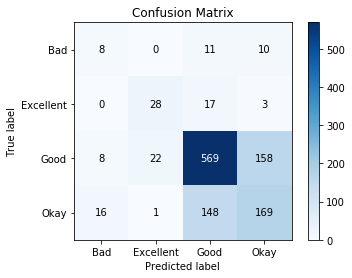

In [586]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

This model is about 65% accurate! This isn't perfect but it is by far the best model we have evaluated thus far in this process.
## KNN

In [587]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [588]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))

0.6626712328767124


This model has the same accuracy as the decision tree model.
## Random Forest Regressor Model

In [589]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=21)    
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7371575342465754

Random Forest Regressor is showing to be the best classification model we have seen thus far! It is 74% accurate in predicting the proper imdb score bin. below, also see the most important variable to the model when predicting imdb score bin.

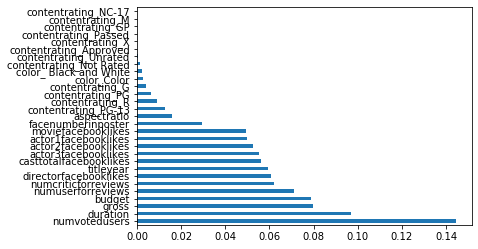

In [590]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

## Comparison of actual to predicted imdbscore bin

In [591]:
predictedY = dt.predict(X)
print(predictedY)

['Excellent' 'Good' 'Good' ... 'Good' 'Okay' 'Good']


In [592]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head()

,predicted Y
0,Excellent
1,Good
2,Good
3,Excellent
4,Good


In [593]:
data = df1.join(predictedY) 
q = data[['bin','predicted Y']]
q.head(20)

,bin,predicted Y
0,Good,Excellent
1,Good,Good
2,Good,Good
3,Excellent,Excellent
5,Good,Good
6,Good,Good
7,Good,Good
8,Good,Good
9,Good,Good
10,Good,Good


# Clustering Analysis

In [594]:
df.drop(['color', 'directorname', 'actor1name', 'actor2name', 'actor3name', 'genres', 'movietitle', 'plotkeywords', 'movieimdblink', 'language', 'country', 'contentrating', 'bin'], axis=1, inplace=True)

## K means
I chose to have 3 clusters as there were only two cluster that had significantly differnt mean imdbscores.

In [595]:
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [596]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [597]:
k_means.cluster_centers_

array([[1.63202829e+02, 1.09883428e+02, 7.80586722e+02, 7.53274833e+02,
        7.59293956e+03, 5.11193178e+07, 1.02621922e+05, 1.12760546e+04,
        1.38085435e+00, 3.27446989e+02, 3.92357625e+07, 2.00308106e+03,
        1.97098173e+03, 6.46227483e+00, 2.11446475e+00, 9.14384251e+03],
       [3.63000000e+02, 1.10000000e+02, 5.84000000e+02, 7.40000000e+01,
        6.29000000e+02, 2.20141200e+06, 6.88830000e+04, 1.17300000e+03,
        0.00000000e+00, 2.79000000e+02, 1.22155000e+10, 2.00600000e+03,
        3.98000000e+02, 7.00000000e+00, 1.85000000e+00, 7.00000000e+03],
       [1.38500000e+02, 1.20750000e+02, 1.53075000e+03, 2.21000000e+02,
        5.26750000e+02, 7.79033500e+05, 7.35975000e+04, 1.15475000e+03,
        2.50000000e-01, 2.06250000e+02, 2.80687997e+09, 2.00275000e+03,
        3.28750000e+02, 7.52500000e+00, 2.10000000e+00, 4.14500000e+03]])

In [598]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df2 = df.join(df1)
df2.head()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,0.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,0.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,0.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,0.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,0.0


In [599]:
df2.groupby('cluster').mean()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
cluster,,,,,,,,,,,,,,,,
0.0,171.683323,111.673089,869.854004,830.34407,8160.005719,5.756335e+07,112659.949729,12220.471102,1.412402,351.03522,5.167343e+07,2003.530403,2185.022577,6.437327,2.131114,9890.487658
1.0,230.000000,142.000000,0.000000,1000.00000,22000.000000,9.929000e+06,152306.000000,29475.000000,0.000000,513.00000,1.500000e+07,1985.000000,5000.000000,8.000000,1.850000,16000.000000
2.0,176.333333,93.333333,58.333333,266.00000,19536.000000,4.151876e+07,33018.666667,20709.666667,0.666667,94.00000,1.866667e+07,2010.000000,525.000000,6.366667,1.993333,5666.666667


In [600]:
df2.groupby('cluster').count()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
cluster,,,,,,,,,,,,,,,,
0.0,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322,3322
1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


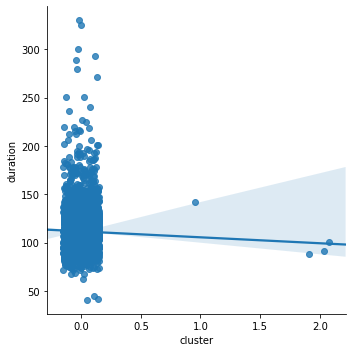

In [601]:
sns.lmplot("cluster", "duration", df2, x_jitter=.15, y_jitter=.15)

### Profiles
#### Cluster 0: (*LARGE MAJORITY*)
This cluster contains over 99 percent of the data points, so the profile of this seems to be almost exactly similar to the average values of the dataset as a whole.
#### Cluster 1:
This "cluster" contains only one datapoint. This datapoint could've been such an outlier that it could not be group with 99% of the dataset, but it most likely is due to the fact that we didnt normalize the data first for this clustering analysis. This data point does fit all of the characteristics of an 'excellent' rated movie on imdb, though, because it has a long duration, a high number of number of users and critics used for reviews. 
#### Cluster 2:
Only 3 datapoints fit into this cluster. They might also be outliers in the computation as they have a short duration and a low number of number critics and users used for reviews.

# Summary
Overall, we determined that using maching learning tools that predicting IMDB Scores was not as easy as it seems. Even though we were provided lots of data points on each movie, some that were even seemingly unecessary, but we were unable to create a model that predicted IMDB score at an accuracy of even 80% or higher. 

## Regression
### SK Learn accuracy: 34.70%
### Statmodel accuracy: 34.70%
   * Lasso accuracy: 34.44%
   * k=3 accuracy: 27.10%
This method of prediction was not very accurate in this dataset. The highest accuracy rate we came accross in this analysis was just under 35%. Though it is good some kind of pattern was found, this model could only say it predicted an imdb score with 34% accuracy, and frankly that is not impressive. It could help filmmakers guess a relative score, but is not reliable and should not be implemented for accurate prediction. 
### Regression Conclusions
   * This type of analysis is not impressive
   * Accuracy rates for these models are far too low to be realistic predictors
   * Should not be deployed in business decisions

## Classification
### Decision Tree accuracy: 65.50%
### KNN accuracy: 65.50%
### Random Forest Regressor accuracy: 74.49%
We started our classification analysis by creating classes, or categories, based on each movie's IMDB score. These classes were bad, okay, good, and excellent, and we proved that the diffences of these classes were significantly significant. From here we created three different models, listed above, and calculated their accuracy using r-squared. The most accurate of our predictor models was the random forest regressor, and it was able to accurately predict the bin of over 74% of movies. This is over twice as accurate as the regression models we created, and was the best at predicting IMBD score' bin overall. 
### Classification Conclusions
   * This model did a pretty good job of predicting IMBD score bins
   * This model could be realisticly used, though is not accurate enough to be decisive
   * Decison to use this analysis in business decisions or not should be situationally decided
   
## Clustering 
### K means
This model did not prove to be very useful, just based on the sizes of the clusters it returned. Of over 3000 entries, it created cluster sizes of 3322, 1, and 3. This means it would group over 99.8% of movies into the first cluster, and that doesn't really narrow down the potential IMDB score. It basically just assigns a movie in this class the average overall IMDB score for the entire datebase. This may be a good starting place for filmmakers, but there is no reason not to just use the database mean instead of using a complex machine learning analysis in this case. Increasing and decreasing the k value did not significantly affect these results. 
### Clustering Conclusions
   * This type of analysis is redundant of baseline calculations
   * If business decisions were made from this model, overall mean would be easier to implement 
   * This model should not be used, as it is just a harder-to-create naive approach.
   
# Final Decision
**Of the different models and analyses we explored in this notebook, the *Random Forest Regressor* is the most effective model for predicting IMDB Score with an accuracy of 74.49%.**
 
*The following column names were the 10 most important x variables for the computation of this model:*
     1. Numvoteduser
     2. duration
     3. numuserforreviews
     4. budget
     5. numcrticforreviews
     6. gross
     7. directorfacebooklikes
     8. casttotalfacebooklikes
     9. titleyear
     10. actor3facebooklikes

References: Dr. Chae, StackOverflow.com